In [1]:
#Description: This Project is about sentiment analysis of Bitcoin from twitter users
#Import libraries
import tweepy as tw
from textblob import TextBlob
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the twitter API credentials
consumer_key = 'TtklIRVTkb9EolfQtKQC46aTi'
consumer_secret = 'A4XMN85zg9nAGdTrWhREd8NmqQNHbC0WCyXrfxCMDMdNq1jodj'
access_token = '285151514-vNy2WnkHolj7ndhCjR4ffQA1bptzJCx2TEsSCzcg'
access_token_secret = 'F9Bps0R3tmOlTZl8hlM6Hx2LqNZ25GjdeSREdwQ2ed6ci'

In [3]:
#Create the Authentication object
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
#Gather 2000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'
#Create a cursor object
tweets = tw.Cursor(api.search, q=search_term, lang='en', since ='2022-01-01', tweet_mode= 'extended').items(2000)
#Store the tweets in a variable and get the full text
all_tweets =[tweet.full_text for tweet in tweets]

In [5]:
#Create a dataframe to stre the tweets with a column called 'Tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#Show the first 5 rows of data
df.head(5)

,Tweets
0,#PiNetworkMarket tends to beat the rates of #B...
1,The real king of all tokens 👑 $PIT @BscPitbull...
2,@JimDuffy_ I expect most #bitcoin will be dist...
3,Last Call - Discount Sat's \n#BITCOIN
4,"Large institutions have sold a combined 236,23..."


In [6]:
df.shape

(2000, 1)

In [14]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #Removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt) #Removes the '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9_]+', '', twt)   #Removes any strings with a '#'
  twt = re.sub('\\n', '', twt)             #Removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt)  #Removes any hyperlinks
  return twt

In [15]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data set
df.head(10)

,Tweets,Cleaned_Tweets
0,#PiNetworkMarket tends to beat the rates of #B...,tends to beat the rates of (bitcoin). Here i...
1,The real king of all tokens 👑 $PIT @BscPitbull...,The real king of all tokens 👑 $PIT @BscPitbull...
2,@JimDuffy_ I expect most #bitcoin will be dist...,@JimDuffy_ I expect most bitcoin will be distr...
3,Last Call - Discount Sat's \n#BITCOIN,Last Call - Discount Sat's
4,"Large institutions have sold a combined 236,23...","Large institutions have sold a combined 236,23..."
5,Are you searching for the best #crypto project...,Are you searching for the best project to BUY...
6,Respect the relief pump\nWe prepared for it ac...,Respect the relief pumpWe prepared for it acco...
7,"Looks Soviet, lol.\n\n""Retro style digital col...","Looks Soviet, lol.""Retro style digital collage..."
8,PUMP : 1-Day Chart (1x!) (NORMAL)\nCoin : #...,PUMP : 1-Day Chart (1x!) (NORMAL)Coin : En...
9,"Hey, our community is so strong. See with your...","Hey, our community is so strong. See with your..."


In [17]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,#PiNetworkMarket tends to beat the rates of #B...,tends to beat the rates of (bitcoin). Here i...,0.000000,0.000000
1,The real king of all tokens 👑 $PIT @BscPitbull...,The real king of all tokens 👑 $PIT @BscPitbull...,0.300000,0.200000
2,@JimDuffy_ I expect most #bitcoin will be dist...,@JimDuffy_ I expect most bitcoin will be distr...,0.666667,0.333333
3,Last Call - Discount Sat's \n#BITCOIN,Last Call - Discount Sat's,0.066667,0.000000
4,"Large institutions have sold a combined 236,23...","Large institutions have sold a combined 236,23...",0.428571,0.214286


In [19]:
#Create a function to get the text sentiment
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'    

In [24]:
#Create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,sentiment,Sentiment
0,#PiNetworkMarket tends to beat the rates of #B...,tends to beat the rates of (bitcoin). Here i...,0.000000,0.000000,Neutral,Neutral
1,The real king of all tokens 👑 $PIT @BscPitbull...,The real king of all tokens 👑 $PIT @BscPitbull...,0.300000,0.200000,Positive,Positive
2,@JimDuffy_ I expect most #bitcoin will be dist...,@JimDuffy_ I expect most bitcoin will be distr...,0.666667,0.333333,Positive,Positive
3,Last Call - Discount Sat's \n#BITCOIN,Last Call - Discount Sat's,0.066667,0.000000,Neutral,Neutral
4,"Large institutions have sold a combined 236,23...","Large institutions have sold a combined 236,23...",0.428571,0.214286,Positive,Positive


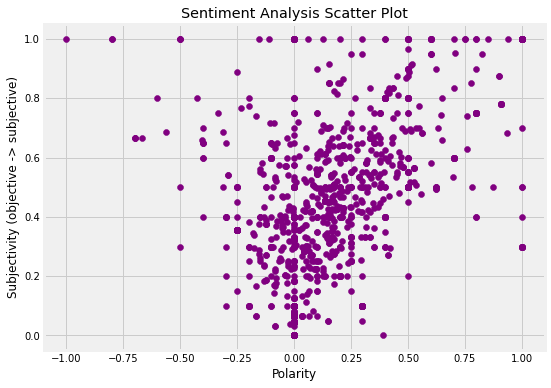

In [23]:
#Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()  

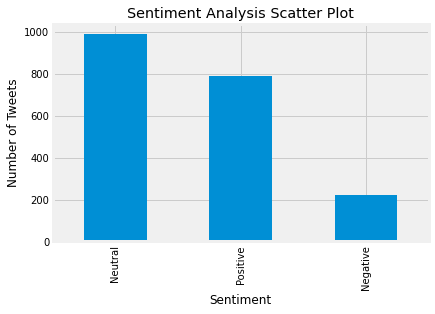

In [25]:
#Create a bar chart to show the count of Positive, Neutral, and Negative sentiment
df['Sentiment'].value_counts().plot(kind= 'bar')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()  